1. [INTRODUCTION](#1) <a id=18></a>
    - 1.1 [DATA HEAD](#2)
    - 1.2 [DATA DICTIONARY](#3)
    - 1.3 [DATA CLEANING](#4)
2. [EXPLORATORY DATA ANALYSIS](#5)
    - 2.1 [CATEGORICAL VALUE DISTRIBUTIONS](#6)
    - 2.2 [NUMERICAL VALUE DISTRIBUTIONS](#7)
    - 2.3 [DISTRIBUTION BY RESPONSE](#8)
    - 2.4 [DATA PREPARATION](#9)
    - 2.5 [CORRELATION PLOTS](#10)
3. [MACHINE LEARNING MODELS](#11)
    - 3.1 [MODELING WITHOUT SAMPLING](#12)
    - 3.1.1 [LOGISTIC REGRESSION](#13)
    - 3.1.2 [KNN](#14)
    - 3.1.3 [DECISION TREES](#15)
    - 3.1.4 [RANDOM FOREST CLASSIFIER](#16)
    - 3.1.5 [XGBOOST](#17)
    - 3.2 [MODELING WITH SAMPLING](#23)
    - 3.2.1 [SAMPLING USING RANDOM SAMPLER](#19)                             
    - 3.2.2 [RANDOM FOREST CLASSIFIER](#20)
    - 3.2.3 [XGBOOST](#21)
    


# **1. INTRODUCTION** <a id=1></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, 
    f1_score, roc_auc_score, confusion_matrix, classification_report, 
    make_scorer, RocCurveDisplay, roc_curve, auc
)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import xgboost as xgb
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings("ignore")

In [2]:
initial_data=pd.read_csv("train.csv")
data=initial_data.copy()

**1.1 DATA HEAD** <a id=2></a>

In [3]:
print('Columns Name:',data.columns.to_list())
print("Total Columns:",sum(data.columns.value_counts()))
print("Total Rows:",data.shape[0])

Columns Name: ['id', 'Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage', 'Response']
Total Columns: 12
Total Rows: 381109


In [4]:
data.head(10)


,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
5,6,Female,24,1,33.0,0,< 1 Year,Yes,2630.0,160.0,176,0
6,7,Male,23,1,11.0,0,< 1 Year,Yes,23367.0,152.0,249,0
7,8,Female,56,1,28.0,0,1-2 Year,Yes,32031.0,26.0,72,1
8,9,Female,24,1,3.0,1,< 1 Year,No,27619.0,152.0,28,0
9,10,Female,32,1,6.0,1,< 1 Year,No,28771.0,152.0,80,0


In [5]:
data.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


**1.2 DATA DICTIONARY** <a id=3></a>


id:Unique ID for the customer

Gender: Gender of the customer

Age: Age of the customer

Driving_License: 0 : Does not have DL, 1 :  Already has DL

Region_Code: Unique code for the region of the customer

Previously_Insured: 1 : Has Vehicle Insurance, 0 : Doesn't have Vehicle Insurance

Vehicle_Age: Age of the Vehicle

Vehicle_Damage: 1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past.

Annual_Premium : The amount customer needs to pay as premium in the year

Policy_Sales_Channel: Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.

Vintage: Number of Days, Customer has been associated with the company

Response: 1 : Customer is interested, 0 : Customer is not interested

 **1.3 DATA CLEANING** <a id=4></a>

In [7]:
data.replace([np.inf, -np.inf], np.nan, inplace=True)

In [8]:
print("Duplicate Values:",data.duplicated().sum())
print("Missing Values:\n",data.isnull().sum())

Duplicate Values: 0
Missing Values:
 id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64


# **2. EXPLORATORY DATA ANALYSIS** <a id=5></a>

In [9]:
def eda_distribution_cat(col,data_set):

   
    fig,axis=plt.subplots(1,2,figsize=(12,6))
    fig.patch.set_facecolor('bisque')
    sns.countplot(x=data_set[col],ax=axis[0])
    axis[0].set_xlabel(col)
    axis[0].set_ylabel('Frequency')
    axis[1].pie(data_set[col].value_counts().to_list(),autopct='%1.1f%%',
               labels=data_set[col].value_counts().keys())
    fig.suptitle(f"{col} Distribution", fontsize=20, y=1.02)
    plt.show()
    

def eda_distribution_num(col,data_set):

    fig,axis=plt.subplots(1,2,figsize=(12,6))
    fig.patch.set_facecolor('bisque')
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        sns.histplot(data_set[col], bins=10, kde=True,ax=axis[0])
        axis[0].set_title(f"Histogram")
        sns.boxplot(x=col,data=data_set,ax=axis[1])
        axis[1].set_title(f"Boxplot")
        fig.suptitle(f" {col} Distribution", fontsize=20, y=1.02)
        plt.show()  
    

**2.1 CATEGORICAL VALUE DISTRIBUTIONS** <a id=6></a>

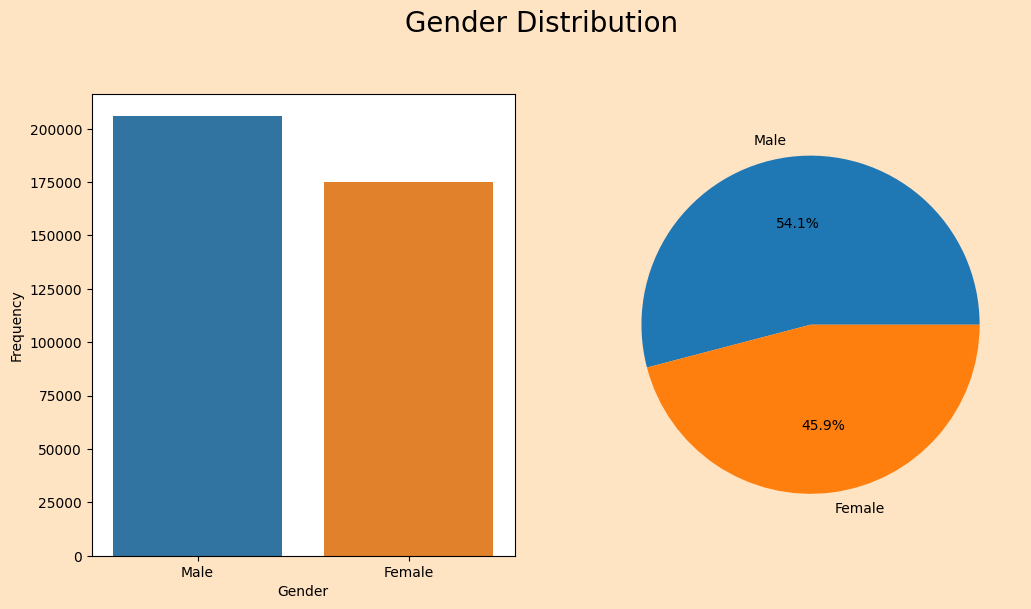

In [10]:
eda_distribution_cat("Gender",data)

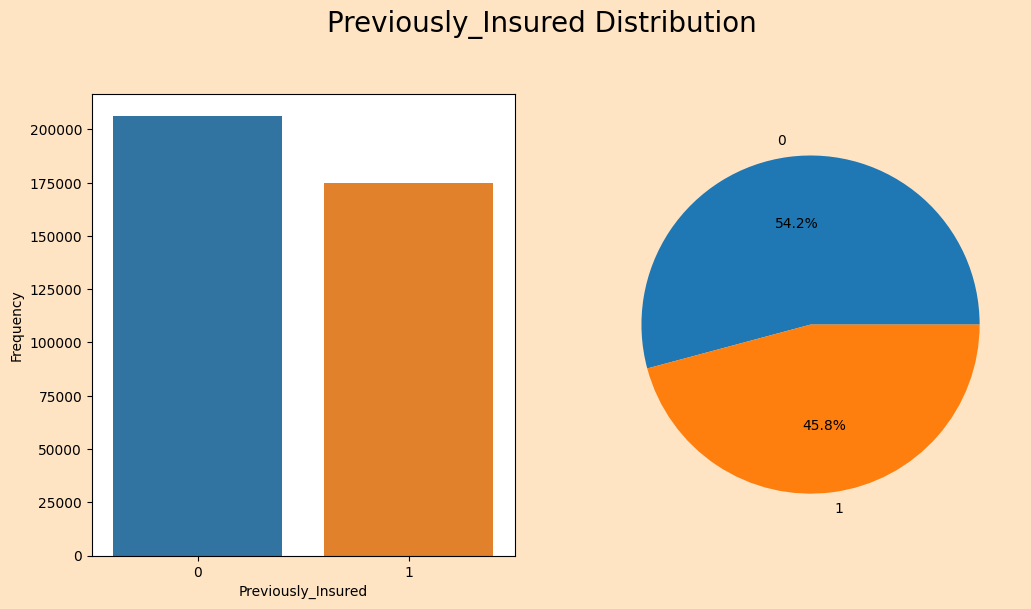

In [11]:
eda_distribution_cat('Previously_Insured',data)

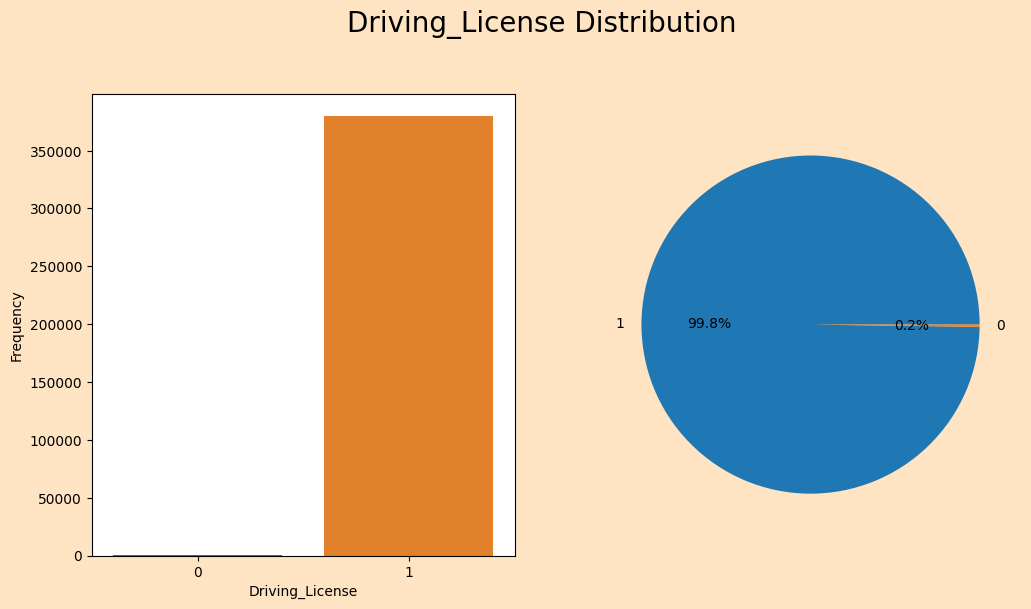

In [12]:
eda_distribution_cat('Driving_License',data)

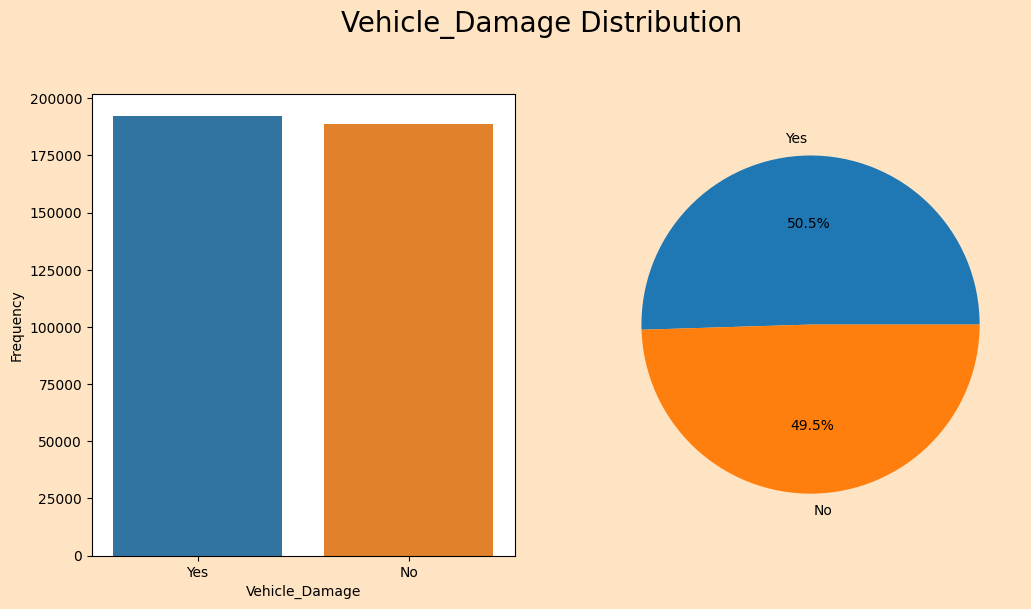

In [13]:
eda_distribution_cat('Vehicle_Damage',data)

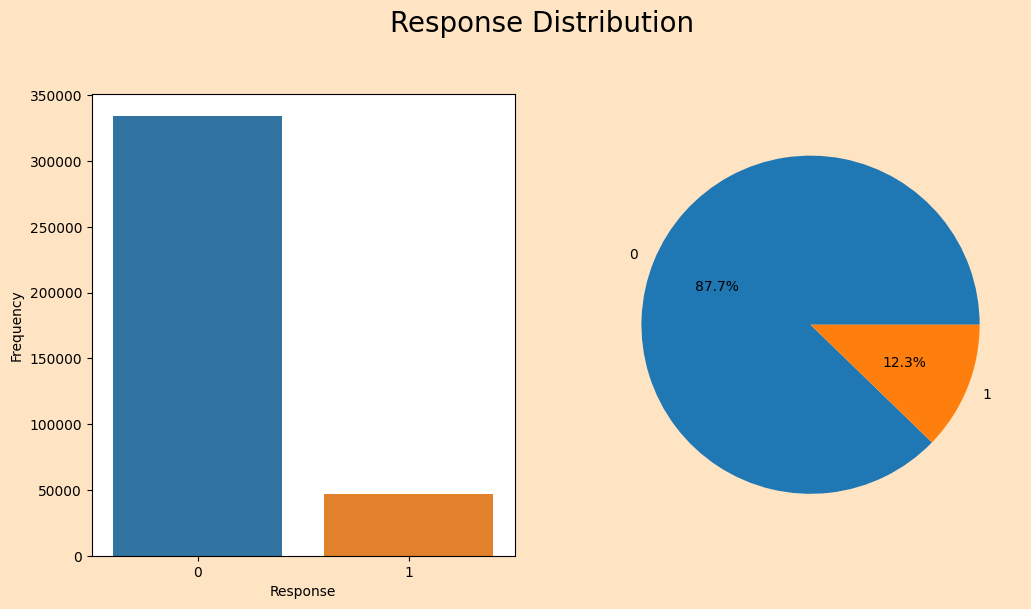

In [14]:
eda_distribution_cat('Response',data)

It can be seen that we have biased data set. We need to take this into account while training our model. 

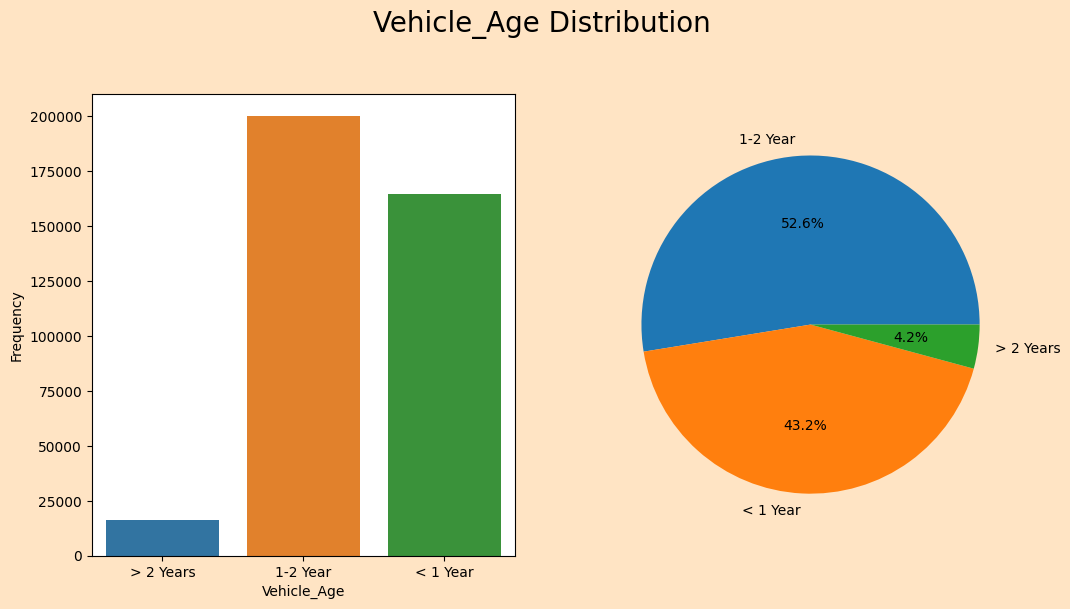

In [15]:
eda_distribution_cat('Vehicle_Age',data)

The majority of our sample data consist of individuals that have new cars.

**2.2 NUMERICAL VALUE DISTRIBUTIONS** <a id=7></a>


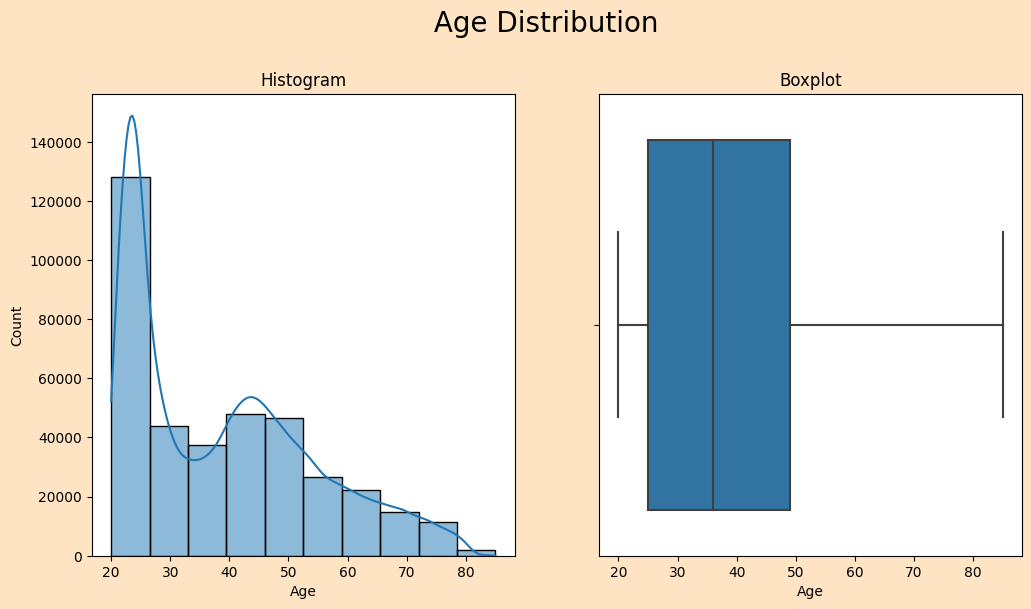

In [16]:
eda_distribution_num("Age",data)

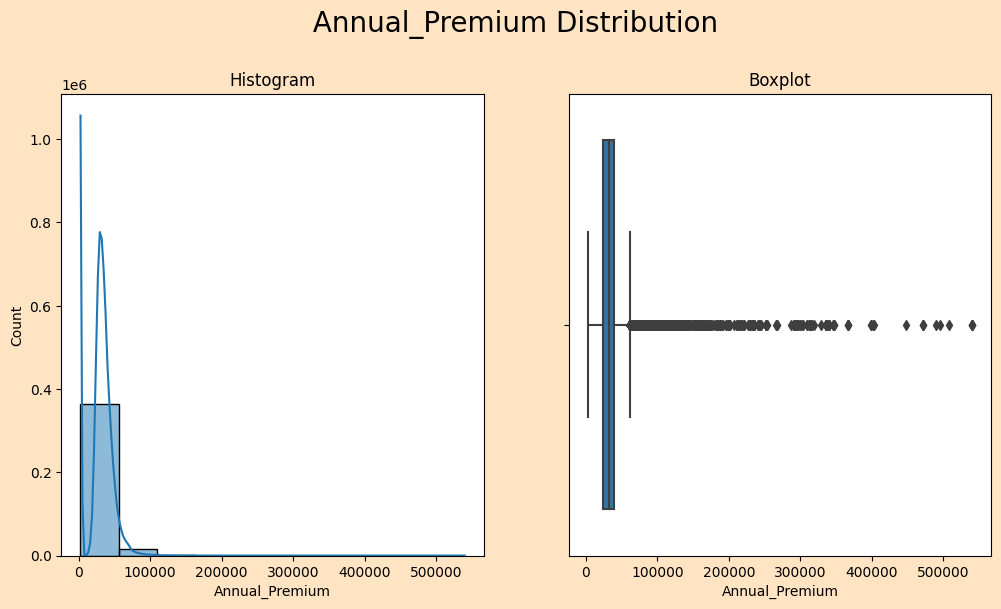

In [17]:
eda_distribution_num("Annual_Premium",data)

It can be seen that there are alot of outliers in the annual premium column and they need to be addressed. 

In [18]:
# Create a figure with two subplots

# fig,axis=plt.subplots(1,2,figsize=(12,6))

# # Set the background color of the figure to 'bisque'

# fig.patch.set_facecolor('bisque')
# # Plot the boxplot of 'Annual_Premium' with outliers

# sns.boxplot(x="Annual_Premium", data=data,ax=axis[0])
# axis[0].set_title(f"Boxplot of Annual_Premium with outliers")

# Calculate the first quartile (Q1) and the third quartile (Q3) of 'Annual_Premium'

Q1 = data['Annual_Premium'].quantile(0.25)
Q3 = data['Annual_Premium'].quantile(0.75)

# Calculate the interquartile range (IQR)

IQR = Q3 - Q1

# Identify outliers using the IQR method

outliers = data[(data['Annual_Premium'] < (Q1 - 1.5 * IQR)) | (data['Annual_Premium'] > (Q3 + 1.5 * IQR)) &(data['Response']==0)]

# Drop the outliers from the dataset

data_1=data.drop(outliers.index)
data_1.reset_index(drop=True,inplace=True)

# # Plot the boxplot of 'Annual_Premium' without outliers

# sns.boxplot(x="Annual_Premium", data=data_1,ax=axis[1])
# axis[1].set_title(f"Boxplot of Annual_Premium without outliers")
# plt.show()
    

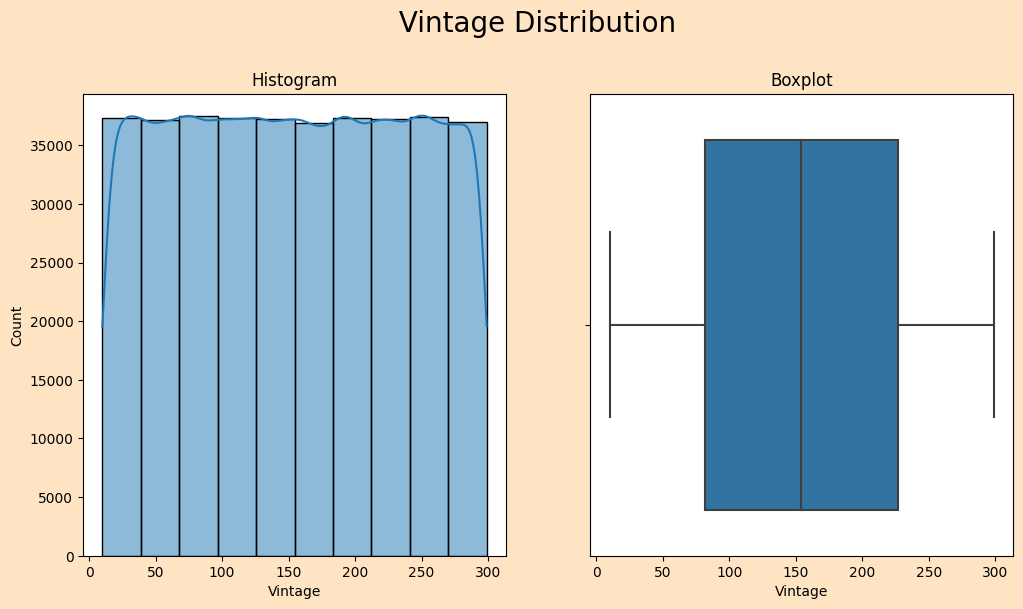

In [19]:
eda_distribution_num("Vintage",data_1)

In [20]:
data['Response'].value_counts()

Response
0    334399
1     46710
Name: count, dtype: int64

In [21]:
 data_1.groupby(['Gender', 'Response']).size().unstack().index[0]

'Female'

**2.3 DISTRIBUTION BY RESPONSE** <a id=8></a>


In [22]:
def response_eda(col,data_set):
    # Determine the number of unique values in the column to decide the number of subplots
    l = len(data_1.groupby([col, 'Response']).size().unstack().index)
    
    # Create a figure with 'l' subplots arranged in one row
    fig, axis = plt.subplots(1, l, figsize=(12, 6))
    
    # Set the background color of the figure to 'bisque'
    fig.patch.set_facecolor('bisque')

    # Group the dataset by the specified column and 'Response', then count the occurrences
    filter_data = data_1.groupby([col, 'Response']).size().unstack()
    
    # Iterate over each unique value in the column
    for i in range(l):
        # Get the current unique value of the column
        loc_value = filter_data.index[i]
        
        # Plot a pie chart for the current unique value
        axis[i].pie(filter_data.loc[loc_value], autopct='%1.1f%%', labels=filter_data.columns)
        
        # Set the title for the current subplot
        axis[i].set_title(loc_value)
        
    # Set the overall title for the figure
    fig.suptitle(f"Response Distribution plot for {col}", fontsize=20, y=1.02)
    
    # Show the figure with all the subplots
    plt.show()

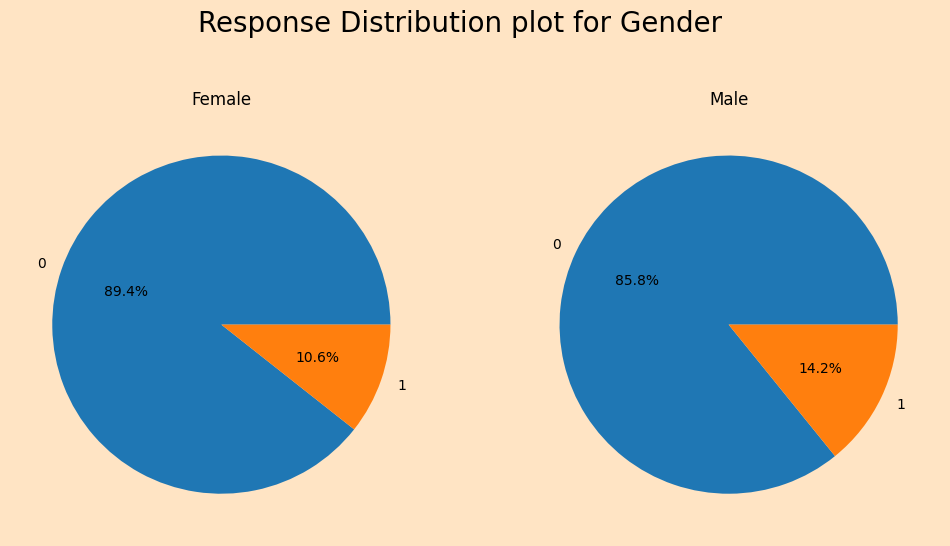

In [23]:
response_eda("Gender",data_1)

Males are more interested in taking vehicle insurance.

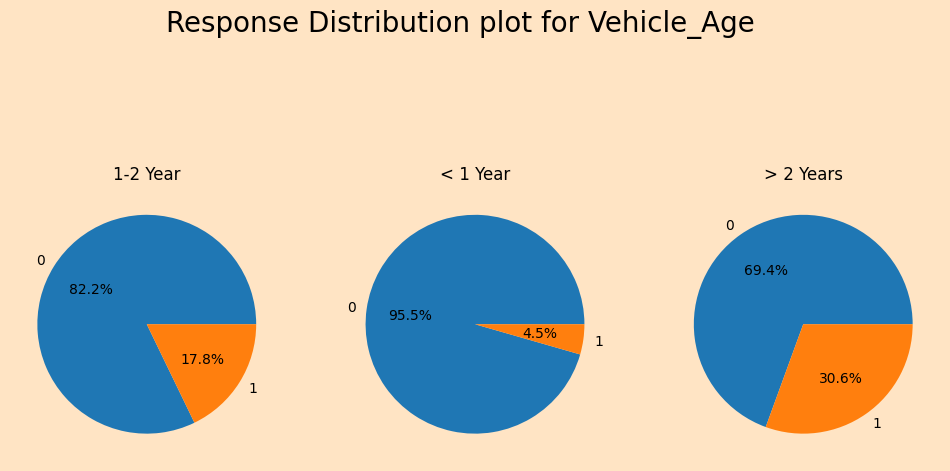

In [24]:
response_eda('Vehicle_Age',data_1)       

It can be seen that the interest in taking insurance increases with the increase in age of a car.

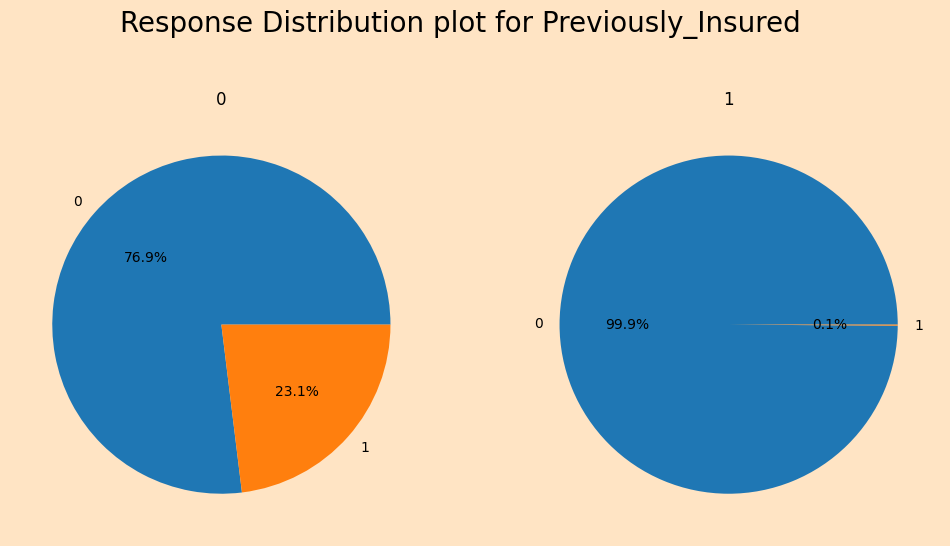

In [25]:
response_eda('Previously_Insured',data_1) 

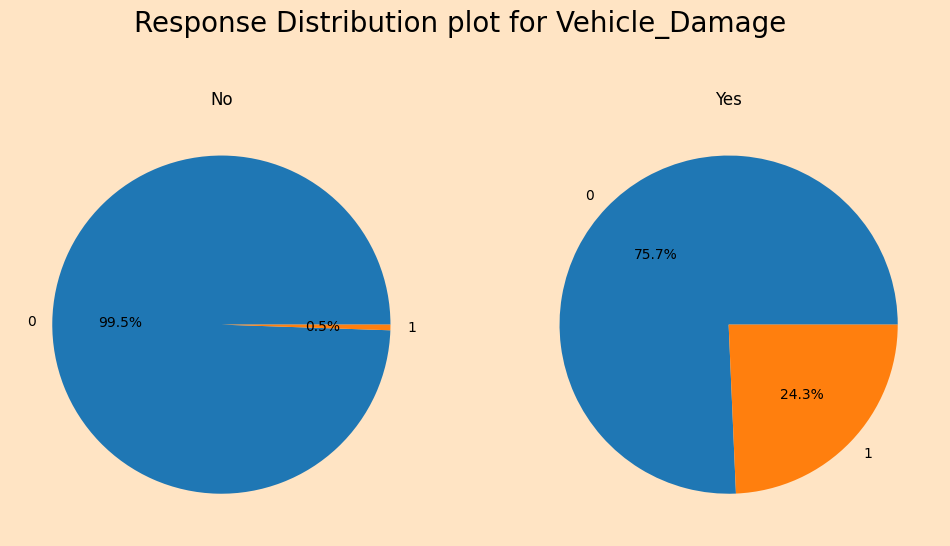

In [26]:
response_eda('Vehicle_Damage',data_1) 

Those who had vehice damage history are more interested in having insurance.

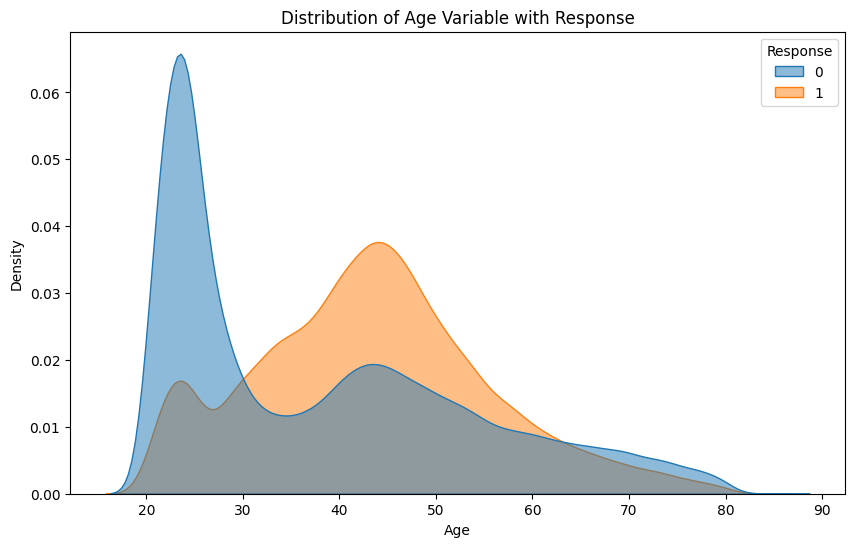

In [27]:
with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        plt.figure(figsize=(10, 6))
        sns.kdeplot(data=data_1, x='Age', hue='Response', fill=True, common_norm=False, alpha=0.5)
        plt.title('Distribution of Age Variable with Response')
        plt.xlabel('Age')
        plt.ylabel('Density')
        plt.show()

As the age increase individuals are more interested in taking insurance

In [28]:
data_1['Log_Annual_Premium'] = np.log(data_1['Annual_Premium'] + 1)

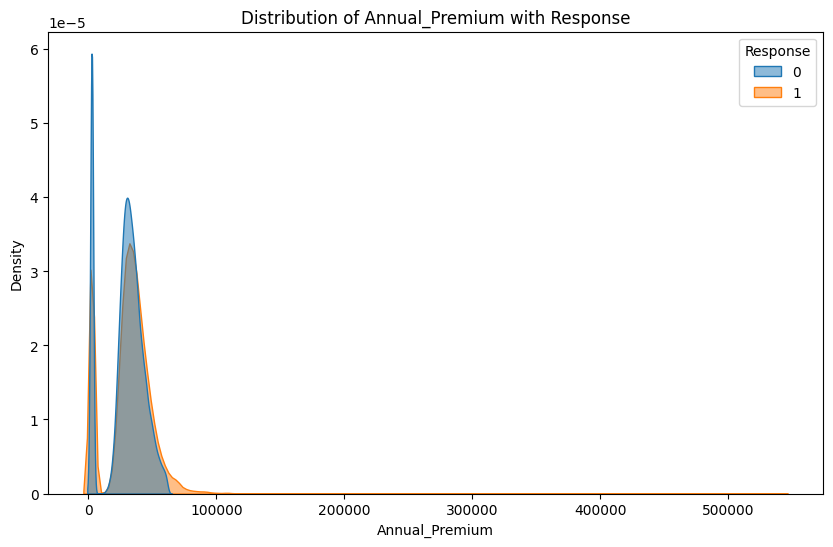

In [29]:
with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        plt.figure(figsize=(10, 6))
        sns.kdeplot(data=data_1, x='Annual_Premium', hue='Response', fill=True, common_norm=False, alpha=0.5)
        plt.title('Distribution of Annual_Premium with Response')
        plt.xlabel('Annual_Premium')
        plt.ylabel('Density')
        plt.show()

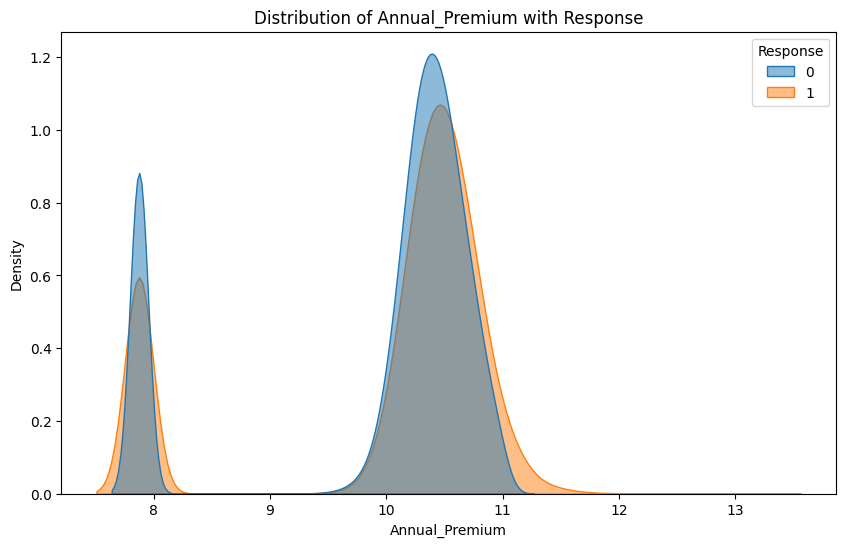

In [30]:
with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        plt.figure(figsize=(10, 6))
        sns.kdeplot(data=data_1, x='Log_Annual_Premium', hue='Response', fill=True, common_norm=False, alpha=0.5)
        plt.title('Distribution of Annual_Premium with Response')
        plt.xlabel('Annual_Premium')
        plt.ylabel('Density')
        plt.show()

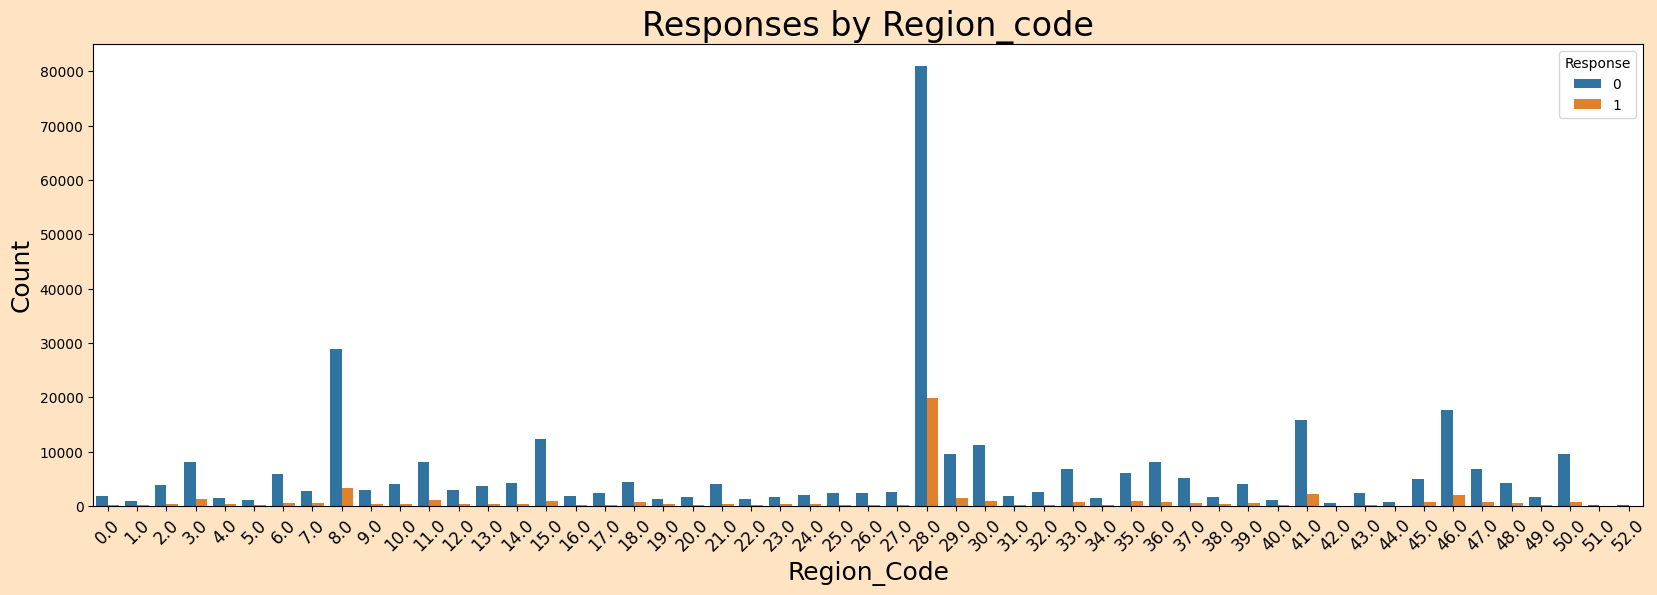

In [31]:
fig, ax = plt.subplots(figsize=(20,6))
fig.patch.set_facecolor('bisque')
ax = sns.countplot(x="Region_Code", hue='Response', data=data_1)
plt.title("Responses by Region_code", fontsize=24)
plt.xlabel('Region_Code', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.xticks(rotation=45, fontsize=12)
plt.show()

In [32]:
# Group the data by 'Region_Code' and 'Response', then count the occurrences

region_df=data_1.groupby(['Region_Code','Response']).size().unstack().copy()

In [33]:
region_df["Total"] = region_df.apply(lambda row: row[0] + row[1], axis=1)

In [34]:
region_df["Percentage_0"]=region_df.apply(lambda row: (row[0]/row['Total'])*100, axis=1)


In [35]:
region_df["Percentage_1"]=region_df.apply(lambda row: (row[1]/row['Total'])*100, axis=1)


In [36]:
region_df_sorted = region_df.sort_values(by='Total', ascending=False)
region_df_sorted.reset_index(inplace=True)
region_df_sorted.head(10)


Response,Region_Code,0,1,Total,Percentage_0,Percentage_1
0,28.0,81037,19917,100954,80.271213,19.728787
1,8.0,28954,3257,32211,89.888547,10.111453
2,46.0,17610,2032,19642,89.654821,10.345179
3,41.0,15759,2224,17983,87.632764,12.367236
4,15.0,12228,958,13186,92.734719,7.265281
5,30.0,11279,900,12179,92.610231,7.389769
6,29.0,9533,1365,10898,87.474766,12.525234
7,50.0,9549,642,10191,93.700324,6.299676
8,3.0,7995,1181,9176,87.129468,12.870532
9,11.0,8086,1041,9127,88.594281,11.405719


 **2.4 DATA PREPARATION** <a id=9></a>

In [37]:
data_2=data_1.copy()


OPTIONAL

In [38]:
# # Get the value counts for the 'Policy_Sales_Channel' column
# value_counts = data_2["Policy_Sales_Channel"].value_counts()

# # Get the value counts for the 'Region_Code' column
# value_counts_2 = data_2["Region_Code"].value_counts()

# # Identify the 'Policy_Sales_Channel' values that have a frequency less than 1000
# less_than_1000 = value_counts[value_counts < 1000].index

# # Identify the 'Region_Code' values that have a frequency less than 1000
# less_than_1000_2 = value_counts_2[value_counts_2 < 1000].index

# # Replace 'Policy_Sales_Channel' values with 1000.0 if their frequency is less than 1000
# data_2["Policy_Sales_Channel"] = data_2["Policy_Sales_Channel"].apply(lambda x: 1000.0 if x in less_than_1000 else x)

# # Replace 'Region_Code' values with 1000.0 if their frequency is less than 1000
# data_2["Region_Code"] = data_2["Region_Code"].apply(lambda x: 1000.0 if x in less_than_1000_2 else x)


In [39]:
# Set the option to suppress future warnings for silent downcasting
pd.set_option('future.no_silent_downcasting', True)

# Create dictionaries to map categorical values to numerical values
gender = {'Male': 0, 'Female': 1}
previously_insured = {0: 1, 1: 0}
vehicle_age = {'> 2 Years': 3, '1-2 Year': 2, '< 1 Year': 1}
vehicle_damage = {'Yes': 1, 'No': 0}

# Replace categorical values with numerical values using the dictionaries
data_2['Gender'] = data_2['Gender'].replace(gender)
data_2['Previously_Insured'] = data_2['Previously_Insured'].replace(previously_insured)
data_2['Vehicle_Age'] = data_2['Vehicle_Age'].replace(vehicle_age)
data_2['Vehicle_Damage'] = data_2['Vehicle_Damage'].replace(vehicle_damage)

# Drop the 'id' and Annual_Premium column as it is not needed for analysis
data_2 = data_2.drop(['id'], axis=1)
data_2 = data_2.drop(['Annual_Premium'], axis=1)

In [40]:
# Perform one-hot encoding on the 'Policy_Sales_Channel' column
one_hot_encoded_psc = pd.get_dummies(data_2['Policy_Sales_Channel'], prefix='PSC')

# Perform one-hot encoding on the 'Region_Code' column
one_hot_encoded_rc = pd.get_dummies(data_2['Region_Code'], prefix='RC')

# Concatenate the original DataFrame with the one-hot encoded columns
data_2_encoded = pd.concat([data_2, 
                            one_hot_encoded_psc.astype('int32'), 
                            one_hot_encoded_rc.astype('int32')], axis=1)


In [41]:
data_2_encoded.columns

Index(['Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Vehicle_Age', 'Vehicle_Damage', 'Policy_Sales_Channel', 'Vintage',
       'Response',
       ...
       'RC_43.0', 'RC_44.0', 'RC_45.0', 'RC_46.0', 'RC_47.0', 'RC_48.0',
       'RC_49.0', 'RC_50.0', 'RC_51.0', 'RC_52.0'],
      dtype='object', length=219)

In [42]:
data_2_encoded.shape


(372344, 219)

**2.5 CORRELATION PLOTS** <a id=10></a>


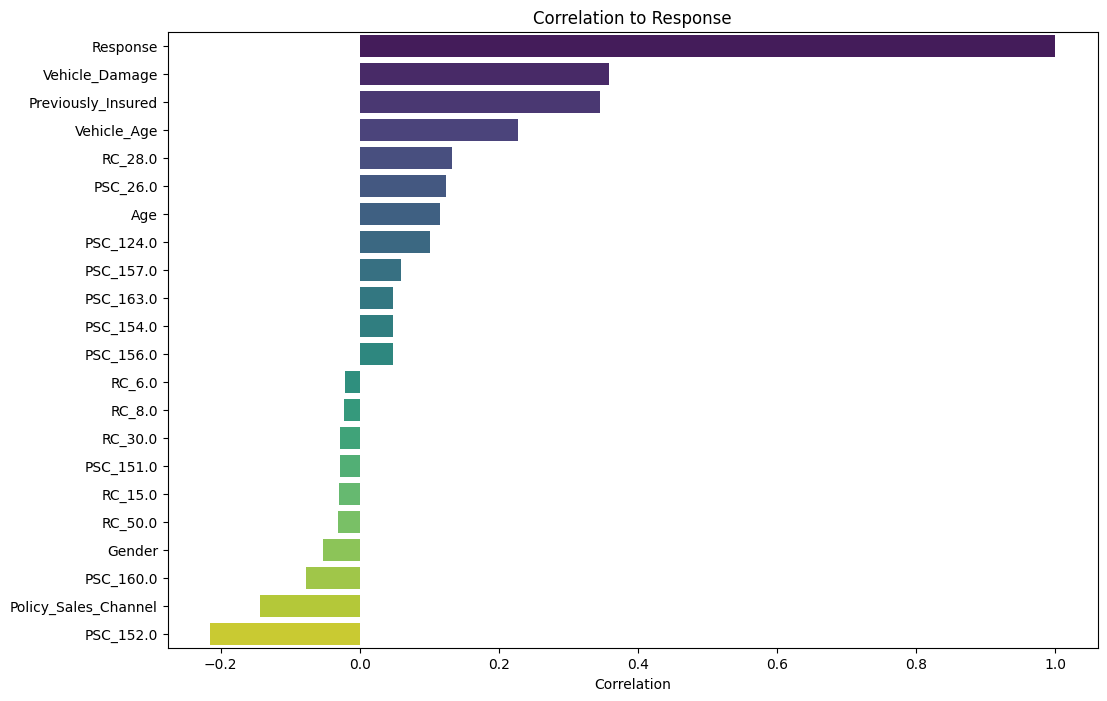

In [43]:
def plot_top_bottom_rank_correlation(df, target, top_rank=10, bottom_rank=10, title=None):
    # Calculate correlation with target variable
    correlation = df.corrwith(df[target]).sort_values(ascending=False)
    
    # Select top and bottom correlated features
    top_features = correlation.head(top_rank)
    bottom_features = correlation.tail(bottom_rank)
    
    # Concatenate top and bottom features
    selected_features = pd.concat([top_features, bottom_features])
    
    # Plot the correlation
    plt.figure(figsize=(12, 8))
    sns.barplot(x=selected_features.values, y=selected_features.index, palette='viridis')
    plt.xlabel('Correlation')
    plt.title(title if title else f'Top and Bottom {top_rank} Correlation with {target}')
    plt.show()

plot_top_bottom_rank_correlation(data_2_encoded, 'Response', top_rank=12, title='Correlation to Response')

In [44]:
data_2_encoded = data_2_encoded.drop(['Policy_Sales_Channel'],axis=1)
data_2_encoded = data_2_encoded.drop(['Region_Code'],axis=1)

In [45]:
#data_2 = data_2.drop(['Policy_Sales_Channel'],axis=1)
#data_2= data_2.drop(['Region_Code'],axis=1)

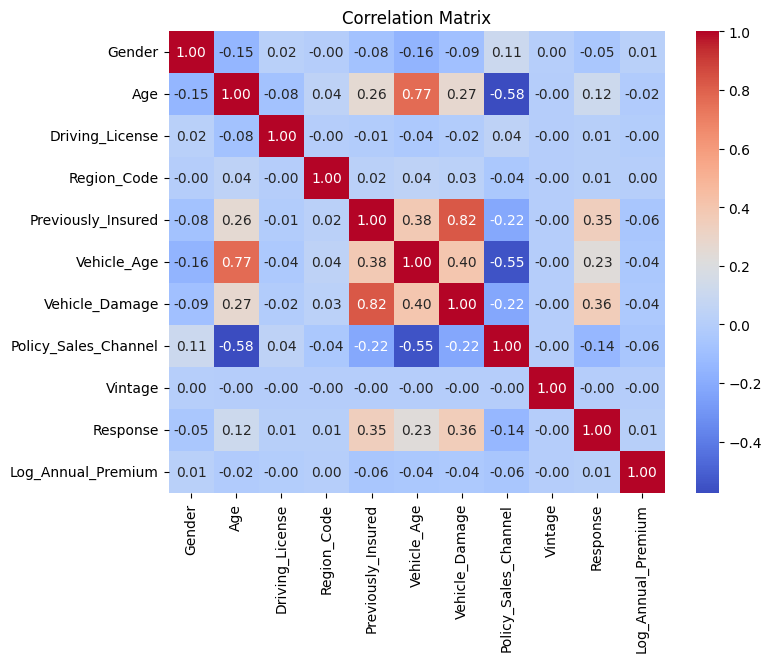

In [100]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

correlation_matrix = data_2.corr()

# Plotting the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [47]:
x=data_2.drop(['Response'],axis=1)

In [48]:
y=data_2["Response"]

In [49]:
x.shape


(372344, 10)

In [50]:
x['Vehicle_Age']=x['Vehicle_Age'].astype(int)
x['Vehicle_Damage']=x['Vehicle_Damage'].astype(int)


In [51]:
# Split the data
X_train_0, X_test_0, y_train_0, y_test_0= train_test_split(x, y, test_size=0.2, stratify=y,random_state=25)



In [52]:
#standardize the data
scaler_0 = StandardScaler()
columns_to_standardize = ['Age','Region_Code','Log_Annual_Premium','Policy_Sales_Channel','Vintage']
X_train_0[columns_to_standardize] = scaler_0.fit_transform(X_train_0[columns_to_standardize])
X_test_0[columns_to_standardize] = scaler_0.transform(X_test_0[columns_to_standardize])

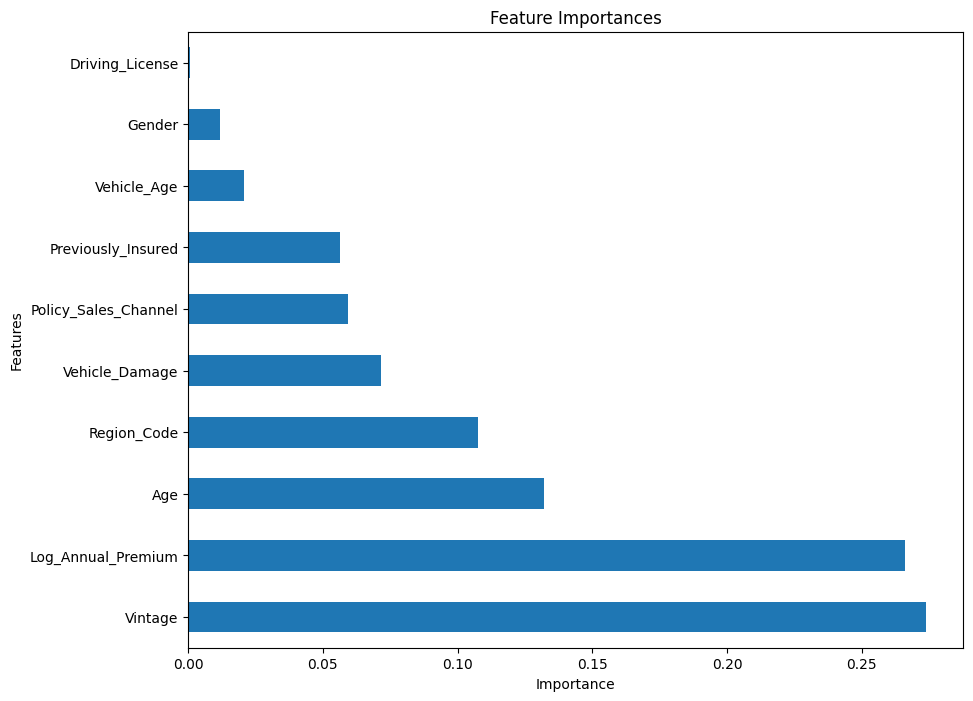

In [53]:
#check important paramters
from sklearn.ensemble import RandomForestClassifier

importances = RandomForestClassifier().fit(x, y).feature_importances_
plt.figure(figsize=(10,8))
feature_names = x.columns
feature_importance = pd.Series(importances, index=feature_names)
feature_importance.sort_values(ascending=False).plot(kind='barh')
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

In [54]:
X_train_0.drop(columns=['Driving_License','Gender'],inplace=True)
X_test_0.drop(columns=['Driving_License','Gender'],inplace=True)

In [55]:

def evaluate_model(model, X_train, y_train, X_test, y_test, model_name, threshold=0.5,roc_='y',conf_='y'):
    
    # Training
    model.fit(X_train, y_train)
    
    # Prediction
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    y_pred = (y_pred_proba >= threshold).astype(int)
    
    # Evaluation
    print(f"{model_name} Results:")
    #print(classification_report(y_test, y_pred))
    
    # ROC-AUC score
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    print(f'ROC-AUC Score: {roc_auc:.4f}')
    
    if conf_=='y':
    # Confusion matrix
        con_matrix(confusion_matrix(y_test, y_pred),model_name)
    if roc_=='y':
        # Plot ROC Curve
        plot_roc_curve(model, X_test, y_test, model_name)

def con_matrix(matrix, model_name):
    plt.figure(figsize=(4, 4))
    sns.heatmap(matrix, annot=True, fmt="d", cmap="YlGnBu", cbar=False)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

def plot_roc_curve(model, X_test, y_test, model_name):
    y_pred_proba = model.predict_proba(X_test)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    plt.figure(figsize=(4, 4))
    plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc_score(y_test, y_pred_proba):.4f})')
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend()
    plt.show()


In [56]:
def train_and_evaluate_model(model, param_grid, X_train, y_train, X_test, y_test):
    
    # Perform GridSearchCV with 5-fold cross-validation
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='roc_auc')
    
    # Fit the grid search to the training data
    grid_search.fit(X_train, y_train)
    
    # Get the best parameters and best score
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    
    print("Best parameters found:", best_params)
    print("Best cross-validation AUC-ROC score:", best_score)
    
    # Make predictions on the testing data using the best model
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    y_pred_proba = best_model.predict_proba(X_test)[:, 1]
    
    # Evaluate the best model
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    conf_matrix = confusion_matrix(y_test, y_pred)
    #class_report = classification_report(y_test, y_pred)
    
    
    #print("\nClassification Report:\n", class_report)
    #print("\nAccuracy:", accuracy)
    print("AUC-ROC:", roc_auc)
    #plot confusion matrix
    con_matrix(conf_matrix, best_model.__class__.__name__)
    
    # Plot ROC curve
    plot_roc_curve(best_model,X_test,y_test,best_model.__class__.__name__)
    
    return best_model

In [57]:

def evaluate_model_with_pca(model, X_train, X_test, y_train, y_test, n_components_list):
   
    accuracy_scores = []
    roc_auc_scores = []

    # Track the best model and its performance
    best_accuracy = 0
    best_n_components = None
    best_conf_matrix = None
    best_class_report = None
    best_model = None
    best_roc_auc = 0

    # Evaluate the model with different numbers of PCA components
    for n in n_components_list:
        pca = PCA(n_components=n)

        # Fit PCA to the training data and transform both training and testing data
        X_train_pca = pca.fit_transform(X_train)
        X_test_pca = pca.transform(X_test)

        # Train the model using the transformed data
        model.fit(X_train_pca, y_train)

        # Make predictions on the testing data
        y_pred = model.predict(X_test_pca)
        y_pred_prob = model.predict_proba(X_test_pca)[:, 1]  # Probability scores for ROC curve

        # Evaluate the model
        accuracy = accuracy_score(y_test, y_pred)
        accuracy_scores.append(accuracy)

        # Calculate ROC-AUC
        fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
        roc_auc = auc(fpr, tpr)
        roc_auc_scores.append(roc_auc)

        if roc_auc > best_roc_auc:
            best_accuracy = accuracy
            best_n_components = n
            best_conf_matrix = confusion_matrix(y_test, y_pred)
            best_class_report = classification_report(y_test, y_pred)
            best_model = model
            best_roc_auc = roc_auc

    # Plot accuracy scores and ROC-AUC scores
    plt.figure(figsize=(12, 6))
    
    #     plt.subplot(1, 2, 1)
    #     plt.plot(n_components_list, accuracy_scores, marker='o')
    #     plt.title('Accuracy Scores for Different PCA Components')
    #     plt.xlabel('Number of PCA Components')
    #     plt.ylabel('Accuracy Score')
    #     plt.grid(True)
    
    #plt.subplot(1, 2, 2)
    plt.plot(n_components_list, roc_auc_scores, marker='o', color='r')
    plt.title('ROC-AUC Scores for Different PCA Components')
    plt.xlabel('Number of PCA Components')
    plt.ylabel('ROC-AUC Score')
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()

    # Print the best model's confusion matrix and classification report
    print(f"Best number of PCA components: {best_n_components}")
    #print("\nClassification Report:")
    #print(best_class_report)
    #print("\nHighest Accuracy:", best_accuracy)
    print("\nROC-AUC Score:", best_roc_auc)

    # Plot ROC curve for the best model
    pca = PCA(n_components=best_n_components)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    fpr, tpr, _ = roc_curve(y_test, best_model.predict_proba(X_test_pca)[:, 1])
    roc_auc = auc(fpr, tpr)
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

    return best_model



# **3. MACHINE LEARNING MODELS** <a id=11></a>

**3.1 MODELING WITHOUT SAMPLING** <a id=12></a>

In [58]:
X_train_0

,Age,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Policy_Sales_Channel,Vintage,Log_Annual_Premium
344028,0.148411,0.118486,0,2,0,-1.838459,-0.685042,0.499931
92394,-0.757452,-1.762575,1,1,1,0.732014,-1.688905,-2.113259
183311,-1.145679,-0.182484,1,1,1,0.732014,-0.218963,0.291645
346136,1.830729,0.118486,1,2,1,-1.598055,-1.103318,0.827874
21130,0.536638,0.118486,1,2,0,-1.598055,-0.673091,0.921025
...,...,...,...,...,...,...,...,...
181396,0.730752,1.472850,1,2,1,0.214221,1.119522,-2.113259
45915,1.248388,-0.558696,1,2,1,0.768999,1.501946,0.420926
226105,-0.369225,0.268971,1,1,1,0.732014,0.964162,0.425998
239531,-0.951566,-1.762575,0,1,0,0.732014,-1.067466,0.431374


**3.1.1 LOGISTIC REGRESSION MODEL** <a id=13></a>

Logistic Regression Results:
ROC-AUC Score: 0.8340


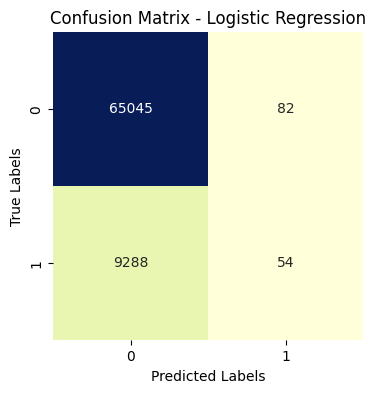

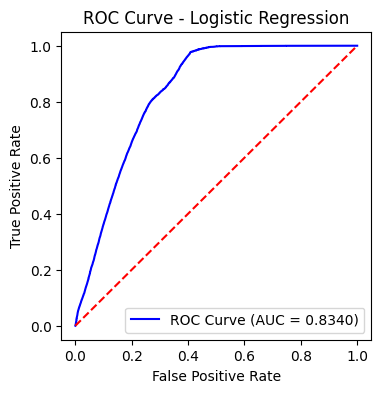

In [59]:
logistic_model = LogisticRegression(max_iter=1000)
evaluate_model(logistic_model, X_train_0, y_train_0, X_test_0, y_test_0, "Logistic Regression")

Logistic Regression Results:
ROC-AUC Score: 0.8343


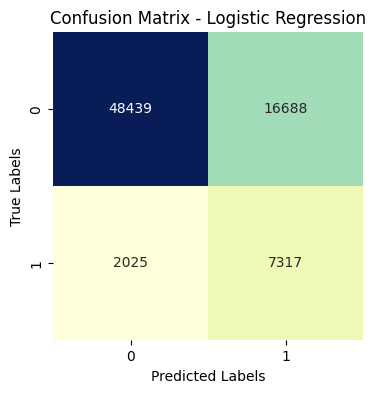

In [60]:
evaluate_model(LogisticRegression(max_iter=2000,class_weight='balanced', penalty='l2'), X_train_0, y_train_0, X_test_0, y_test_0, "Logistic Regression",0.65,roc_='n')

**3.1.2 KNN MODEL** <a id=14></a>

KNeighbors Results:
ROC-AUC Score: 0.7632


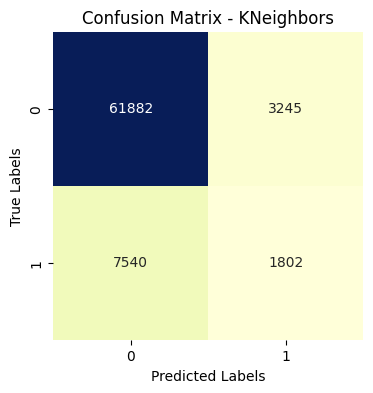

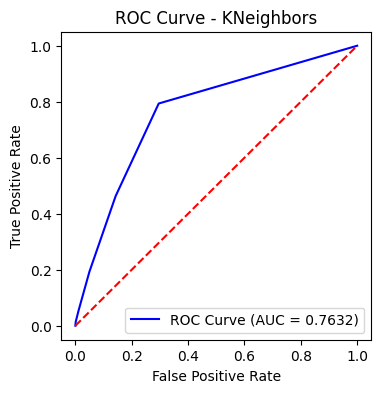

In [61]:
knn_model = KNeighborsClassifier()
evaluate_model(knn_model, X_train_0, y_train_0, X_test_0, y_test_0, "KNeighbors")

KNeighbors Results:
ROC-AUC Score: 0.8513


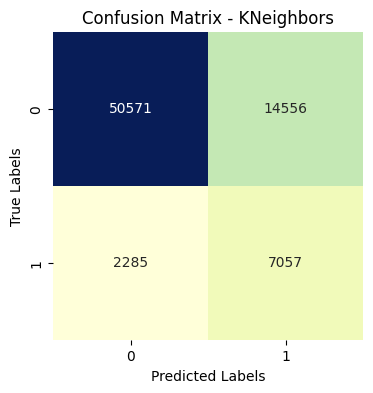

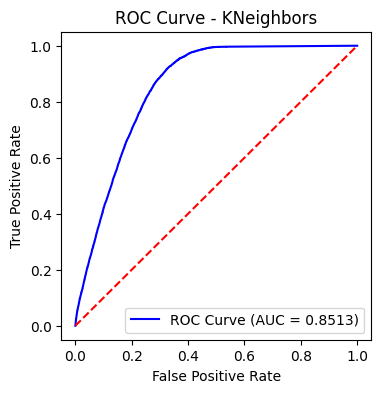

In [85]:
knn_model_2 = KNeighborsClassifier(
    n_neighbors=200, 
    weights='distance', 
    metric='minkowski', 
    p=2, 
    algorithm='auto', 
    leaf_size=30
)

evaluate_model(knn_model_2, X_train_0, y_train_0, X_test_0, y_test_0, "KNeighbors",threshold=0.23)


**3.1.3 DECISION TREE MODEL** <a id=15></a>

DecisionTree Results:
ROC-AUC Score: 0.6064


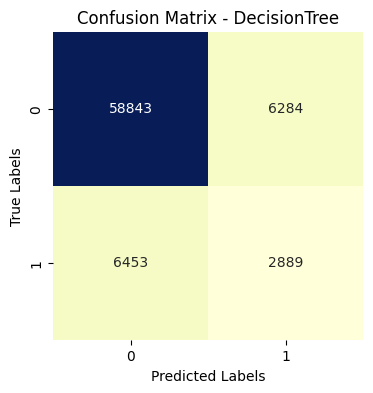

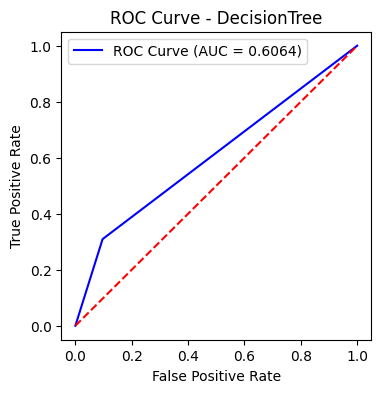

In [62]:
dt_model = DecisionTreeClassifier(class_weight='balanced')
evaluate_model(dt_model, X_train_0, y_train_0, X_test_0, y_test_0, "DecisionTree")

**OPTIMIZATION USING GRID SEARCH CV**

Best parameters found: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10}
Best cross-validation AUC-ROC score: 0.85227173196532
AUC-ROC: 0.8549333103648544


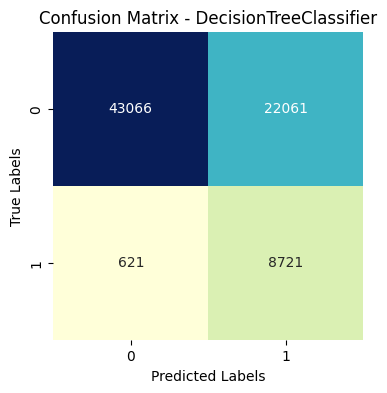

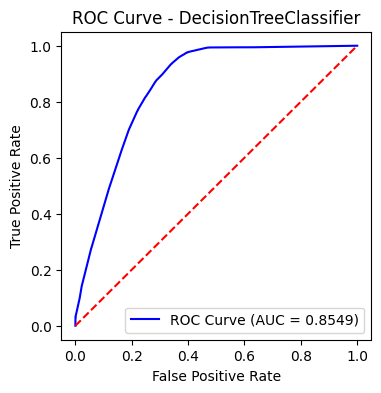

In [63]:
param_grid = {
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2],
    'criterion': ['gini', 'entropy']
}

# Initialize the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(class_weight='balanced')

dt_1=train_and_evaluate_model(dt_classifier,param_grid, X_train_0, y_train_0, X_test_0, y_test_0)

**OPTIMIZATION USING PCA**

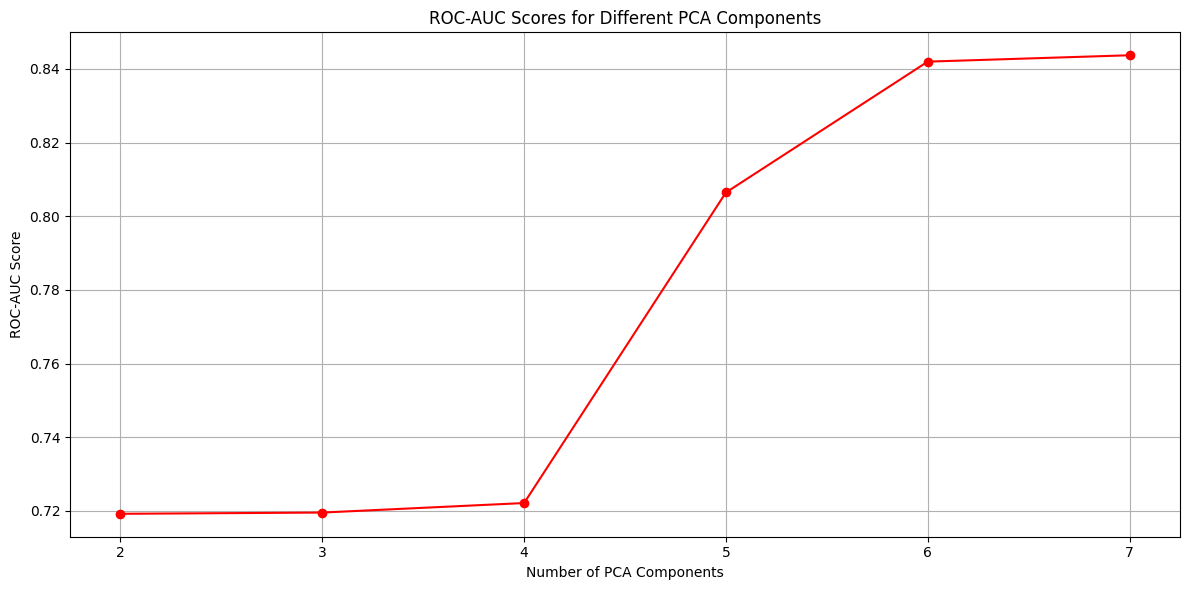

Best number of PCA components: 7

ROC-AUC Score: 0.8437219605083843


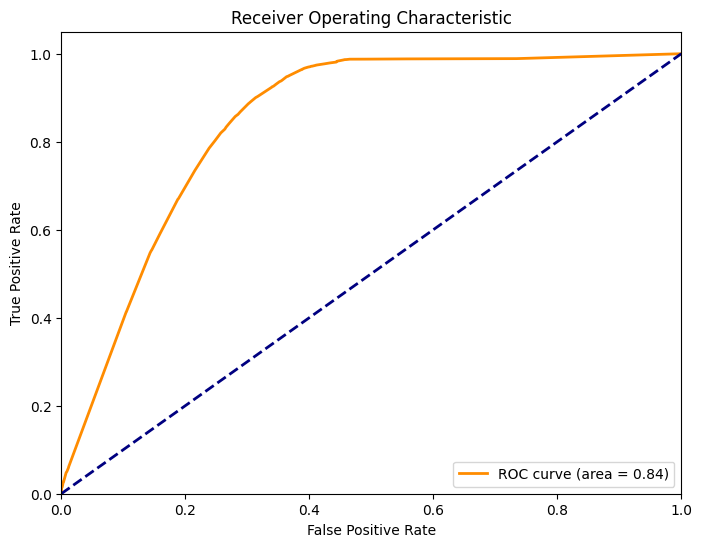

In [64]:
best_model_dt = evaluate_model_with_pca(model=DecisionTreeClassifier(class_weight='balanced',criterion= 'entropy', max_depth= 10, min_samples_leaf= 1, min_samples_split=10),
                                    X_train=X_train_0, X_test=X_test_0,
                                    y_train=y_train_0, y_test=y_test_0,
                                    n_components_list=[2,3,4,5,6,7])


**3.1.4 RANDOM FOREST MODEL** <a id=16></a>


Random Forest Results:
ROC-AUC Score: 0.8392


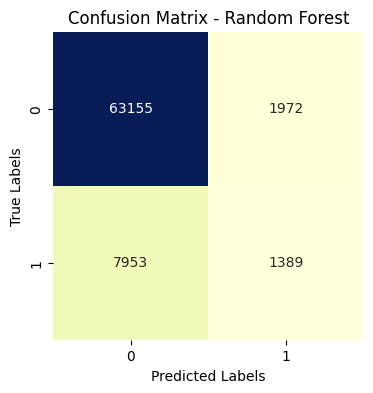

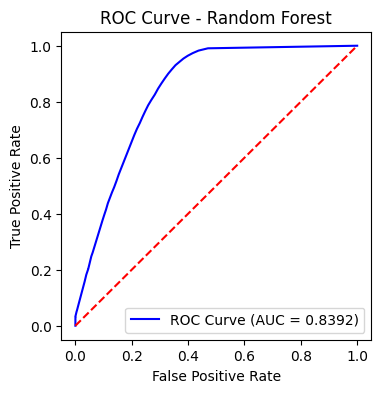

In [65]:
rf_model = RandomForestClassifier(class_weight='balanced')
evaluate_model(rf_model, X_train_0, y_train_0, X_test_0, y_test_0, "Random Forest")

RandomForest Results:
ROC-AUC Score: 0.8599


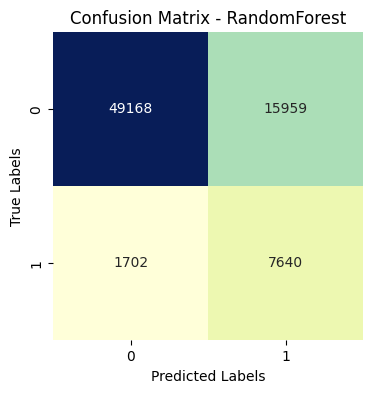

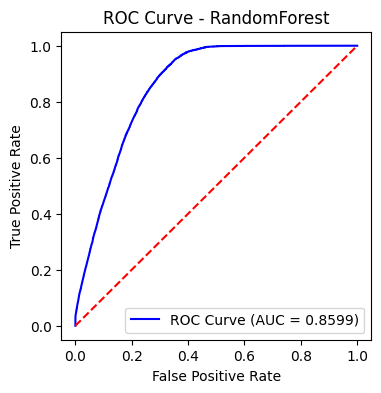

In [86]:
#**FINDIND OPTIMIZATION PARAMETERS USING GRID SEARCH CV**
rf_model_1 = RandomForestClassifier(n_estimators=100,
                                  max_features='sqrt',
                                  max_depth=10,
                                  min_samples_split=10,
                                  min_samples_leaf=1,
                                  bootstrap=False,
                                  criterion='gini',  
                                  class_weight='balanced')
evaluate_model(rf_model_1, X_train_0, y_train_0, X_test_0, y_test_0, "RandomForest",0.65)

**OPTIMIZATION USING PCA**

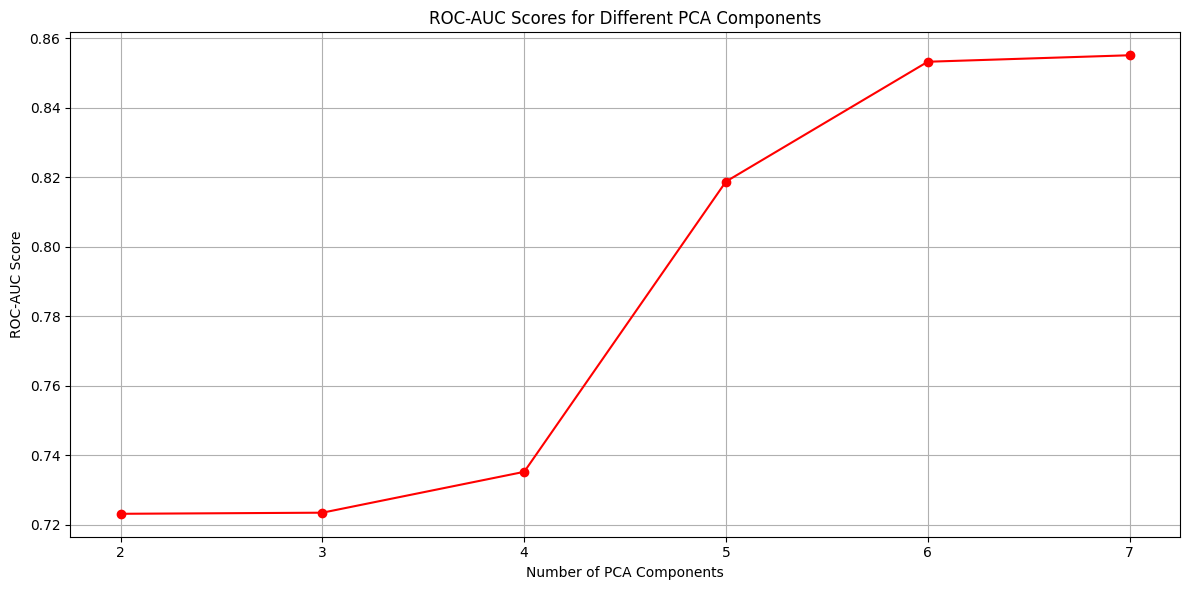

Best number of PCA components: 7

ROC-AUC Score: 0.8550395402370081


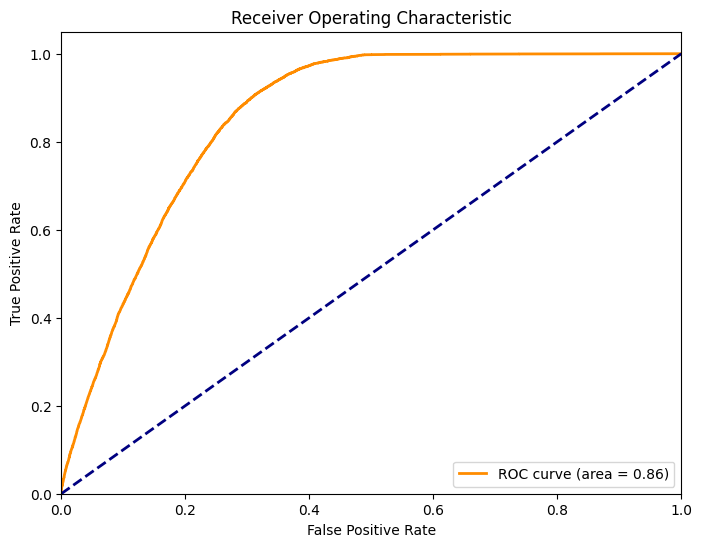

In [67]:

best_model_rf = evaluate_model_with_pca(model=rf_model_1,
                                    X_train=X_train_0, X_test=X_test_0,
                                    y_train=y_train_0, y_test=y_test_0,
                                    n_components_list=[2,3,4,5,6,7])

**3.1.5 XGB MODEL** <a id=17></a>

XGB CLASSIFIER Results:
ROC-AUC Score: 0.8634


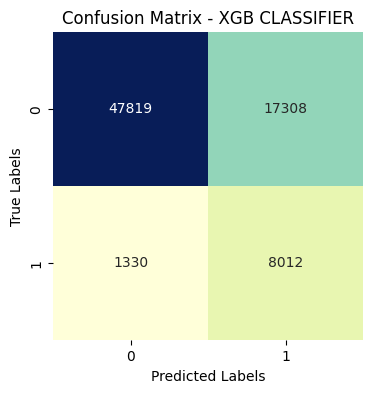

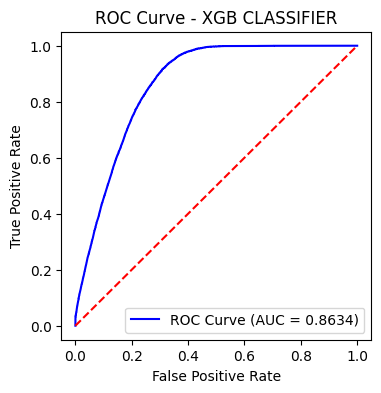

In [87]:
#FINDIND OPTIMIZATION PARAMETERS USING GRID SEARCH CV

# Initialize the XGBoost classifier
xgb_classifier = xgb.XGBClassifier(scale_pos_weight=(sum(y_train_0 == 0) / sum(y_train_0 == 1)),
                                    max_depth= 6,
                                    learning_rate= 0.1,
                                    n_estimators= 100,
                                    gamma= 0,
                                    subsample=1.0,
                                    colsample_bytree=0.8)

evaluate_model(xgb_classifier, X_train_0, y_train_0, X_test_0, y_test_0, "XGB CLASSIFIER",0.6)

**3.2 MODELING WITH SAMPLING** <a id=23></a>

In [69]:
# Split the data
X_train_1, X_test_1, y_train_1, y_test_1= train_test_split(x, y, test_size=0.2, stratify=y,random_state=25)


**3.2.1 SAMPLING USING RANDOM SAMPLER** <a id=19></a>

<Axes: xlabel='Response', ylabel='count'>

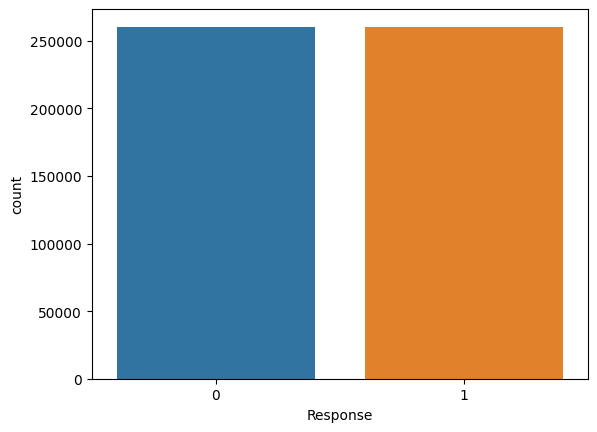

In [70]:
from imblearn.over_sampling import RandomOverSampler

randomsamples=RandomOverSampler()
X_new,y_new=randomsamples.fit_resample(X_train_1,y_train_1)

sns.countplot(x=y_new)

In [71]:
scaler_1 = StandardScaler()
columns_to_standardize = ['Age','Region_Code','Log_Annual_Premium','Policy_Sales_Channel','Vintage']
X_new[columns_to_standardize] = scaler_1.fit_transform(X_new[columns_to_standardize])
X_test_1[columns_to_standardize] = scaler_1.transform(X_test_1[columns_to_standardize])

In [72]:
X_new.drop(columns=['Driving_License','Gender'],inplace=True)
X_test_1.drop(columns=['Driving_License','Gender'],inplace=True)

**3.2.2 RANDOM FOREST** <a id=20></a>

RandomForest Results:
ROC-AUC Score: 0.8604


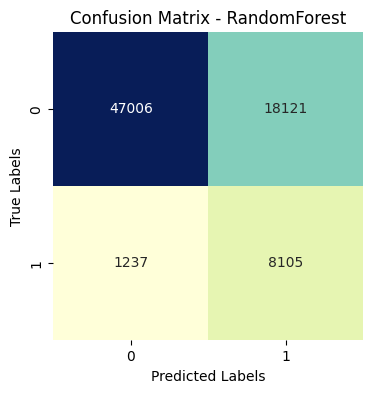

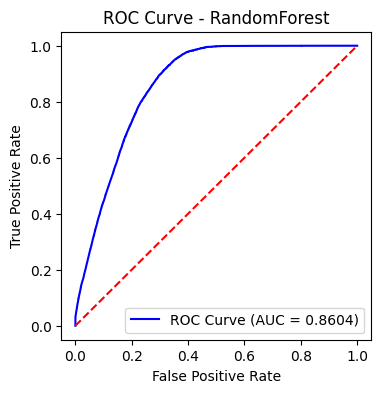

In [88]:
rf_model_2 = RandomForestClassifier(n_estimators=100,
                                  max_features='sqrt',
                                  max_depth=10,
                                  min_samples_split=10,
                                  min_samples_leaf=1,
                                  bootstrap=False,
                                  criterion='gini')
evaluate_model(rf_model_2, X_new, y_new, X_test_1, y_test_1, "RandomForest",0.6)

**3.2.3 XGB BOOST** <a id=21></a>

XGB CLASSIFIER Results:
ROC-AUC Score: 0.8546


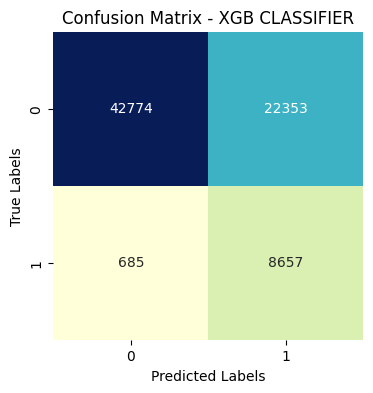

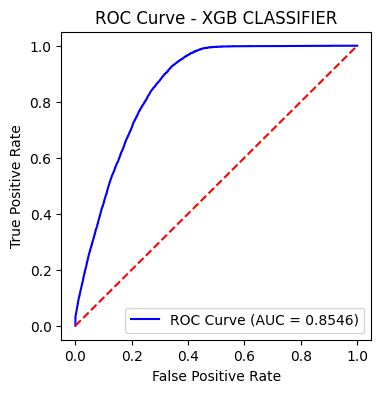

In [90]:
xgb_classifier_2 = xgb.XGBClassifier(scale_pos_weight=(sum(y_train_0 == 0) / sum(y_train_0 == 1)),
                                    max_depth= 9,
                                    learning_rate= 0.1,
                                    n_estimators= 300,
                                    gamma= 0.1,
                                    subsample=1.0,
                                    colsample_bytree=0.8)

evaluate_model(xgb_classifier_2, X_new, y_new, X_test_1, y_test_1, "XGB CLASSIFIER",0.7)

<Figure size 1000x800 with 0 Axes>

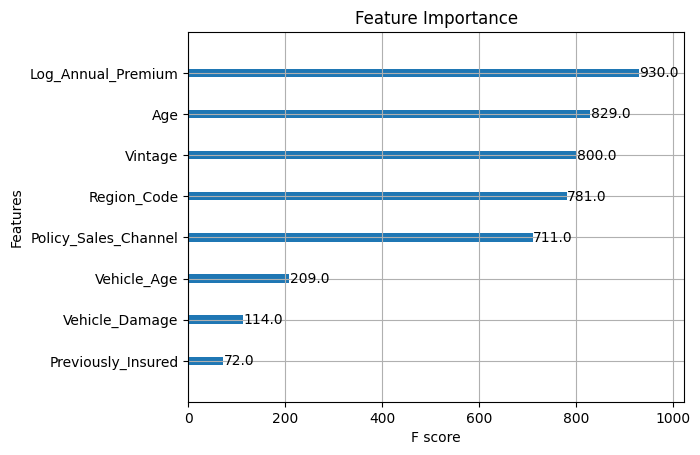

In [95]:
from xgboost import plot_importance

xgb_classifier
xgb_classifier.fit(X_train_0, y_train_0)

# Plot feature importance
plt.figure(figsize=(10, 8))
plot_importance(xgb_classifier, importance_type='weight')  # You can also use 'gain' or 'cover'
plt.title('Feature Importance')
plt.show()